In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('student_monnitoring_data.csv', index_col=0).reset_index()

In [3]:
data

,Student ID,Date,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,1,2024-12-01,9:00-15:00,Late,0.92,7.6,6,6,Low
1,1,2024-12-02,8:00-16:00,Late,1.17,6.0,6,2,Medium
2,1,2024-12-03,11:00-14:00,Late,4.56,6.3,4,8,High
3,1,2024-12-04,11:00-16:00,Late,3.07,9.0,2,10,Low
4,1,2024-12-05,9:00-13:00,Absent,3.93,7.4,9,4,High
...,...,...,...,...,...,...,...,...,...
14995,500,2024-12-26,9:00-16:00,Late,1.30,7.2,7,10,Low
14996,500,2024-12-27,9:00-15:00,Absent,1.07,7.9,4,6,High
14997,500,2024-12-28,11:00-14:00,Absent,1.67,7.2,3,5,High
14998,500,2024-12-29,11:00-14:00,Late,0.99,7.2,10,9,Medium


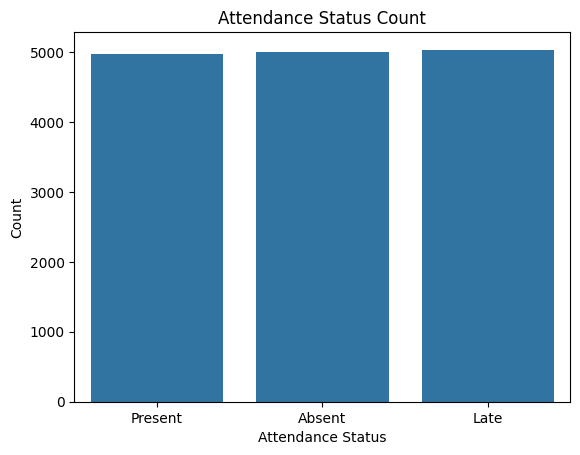

In [4]:
attendance_counts = data['Attendance Status'].value_counts().sort_values()

sns.barplot(x=attendance_counts.index, y=attendance_counts.values)

plt.xlabel('Attendance Status')
plt.ylabel('Count')
plt.title('Attendance Status Count')

plt.show()

In [5]:
def plot_graph(data):
    plt.plot(data)
        
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Graph of Given Data')
    
    plt.show()

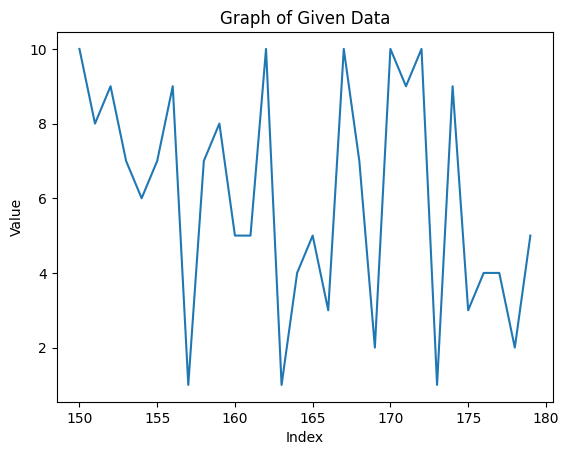

In [6]:
plot_graph(data[data['Student ID'] == 6]['Anxiety Level'])

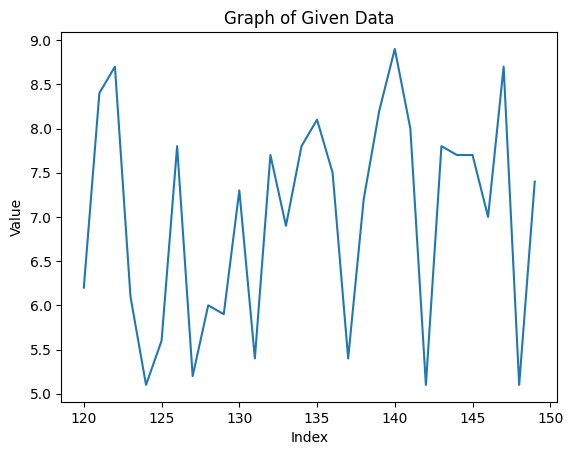

In [7]:
plot_graph(data[data['Student ID'] == 5]['Sleep Hours'])

In [8]:
data.columns

Index(['Student ID', 'Date', 'Class Time', 'Attendance Status',
       'Stress Level (GSR)', 'Sleep Hours', 'Anxiety Level', 'Mood Score',
       'Risk Level'],
      dtype='object')

In [9]:
sleep_hours = data.groupby('Student ID').agg({'Sleep Hours' : 'mean'})

In [19]:
def plot_distribution(data, bins=30):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=False, bins=bins, color='skyblue')
    plt.title('Histogram of the Data')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

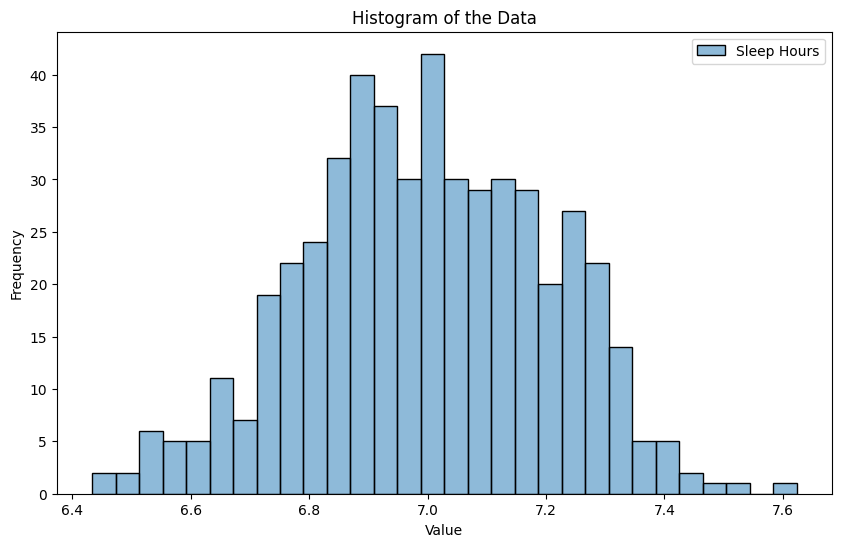

In [20]:
plot_distribution(sleep_hours)

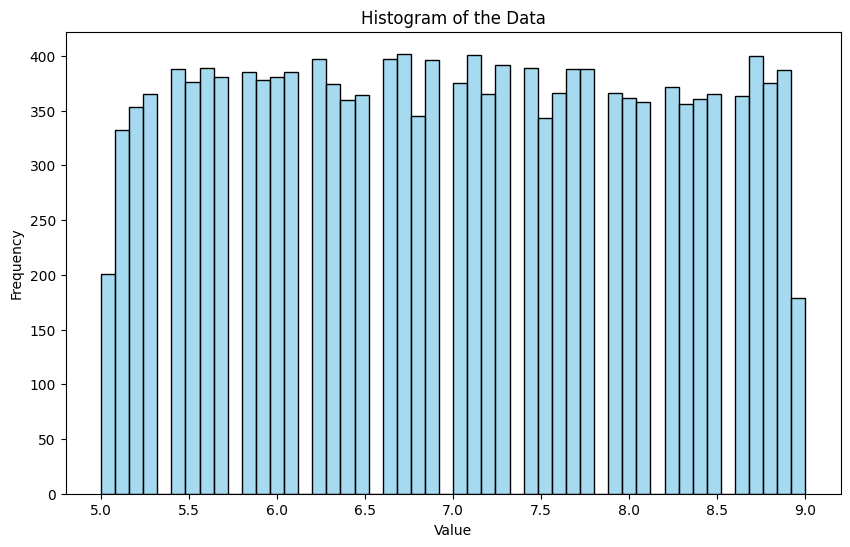

In [22]:
plot_distribution(data['Sleep Hours'], bins=50)

In [23]:
data['class_start_time'] = data['Class Time'].apply(lambda x: x.split('-')[0])
data['class_start_time'] = pd.to_datetime(data['class_start_time'], format='%H:%M').dt.time

In [24]:
data['class_start_time']

0        09:00:00
1        08:00:00
2        11:00:00
3        11:00:00
4        09:00:00
           ...   
14995    09:00:00
14996    09:00:00
14997    11:00:00
14998    11:00:00
14999    09:00:00
Name: class_start_time, Length: 15000, dtype: object

In [29]:
late_part = lambda group: (group != 'Present').sum() / len(group)

data.groupby('class_start_time').agg({'Attendance Status' : late_part})

,Attendance Status
class_start_time,
08:00:00,0.660538
09:00:00,0.677428
10:00:00,0.673118
11:00:00,0.664726
